56.23413251903491
47967905.11076225
-9464773170.414661
(2, 5903921347482.432)
[[Eq(f(x), C1 + C2*exp(x)), Eq(g(x), C2*exp(x))]]


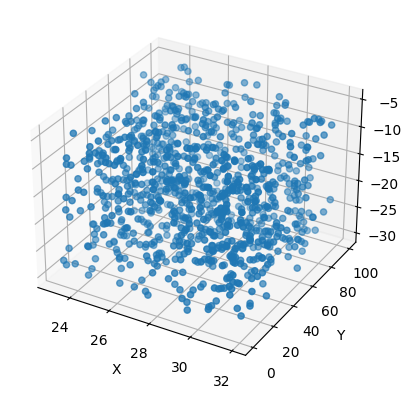

Automatically created module for IPython interactive environment
None 0.8133333333333334
0.2 0.82


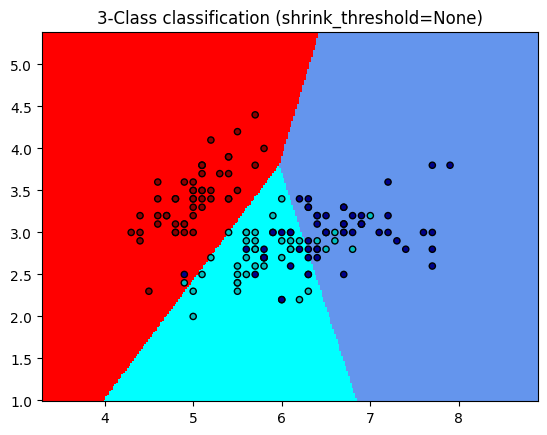

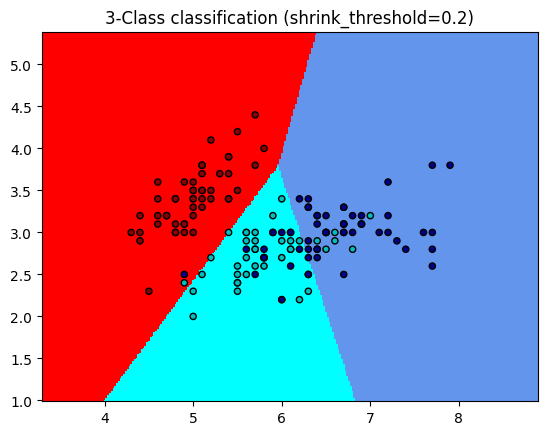

Epoch 1/300
10/10 - 23s - loss: 2.6838 - val_loss: 2.5918 - 23s/epoch - 2s/step
Epoch 2/300
10/10 - 2s - loss: 2.5931 - val_loss: 2.5600 - 2s/epoch - 151ms/step
Epoch 3/300
10/10 - 2s - loss: 2.5391 - val_loss: 2.5228 - 2s/epoch - 213ms/step
Epoch 4/300
10/10 - 2s - loss: 2.5054 - val_loss: 2.4936 - 2s/epoch - 225ms/step
Epoch 5/300
10/10 - 1s - loss: 2.4728 - val_loss: 2.4694 - 1s/epoch - 148ms/step
Epoch 6/300
10/10 - 1s - loss: 2.4398 - val_loss: 2.4439 - 1s/epoch - 144ms/step
Epoch 7/300
10/10 - 1s - loss: 2.4162 - val_loss: 2.4155 - 1s/epoch - 137ms/step
Epoch 8/300
10/10 - 1s - loss: 2.3875 - val_loss: 2.3782 - 1s/epoch - 139ms/step
Epoch 9/300
10/10 - 2s - loss: 2.3544 - val_loss: 2.3452 - 2s/epoch - 166ms/step
Epoch 10/300
10/10 - 1s - loss: 2.3201 - val_loss: 2.3159 - 1s/epoch - 135ms/step
Epoch 11/300
10/10 - 1s - loss: 2.2892 - val_loss: 2.2963 - 1s/epoch - 136ms/step
Epoch 12/300
10/10 - 2s - loss: 2.2616 - val_loss: 2.2611 - 2s/epoch - 199ms/step
Epoch 13/300
10/10 - 2s - 

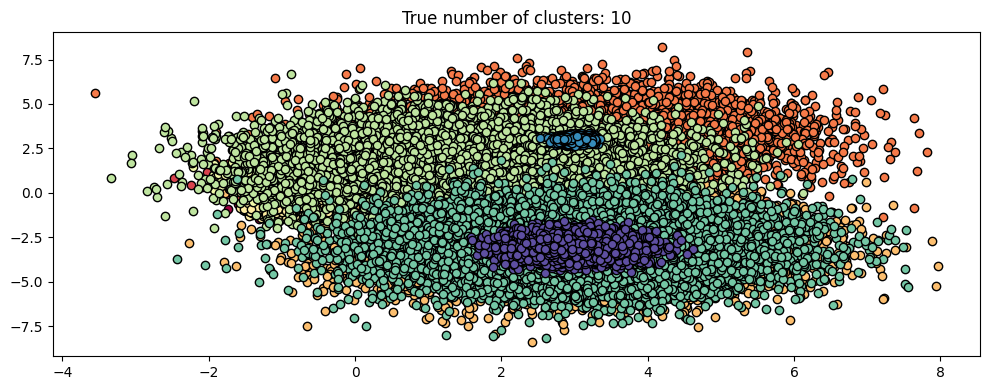

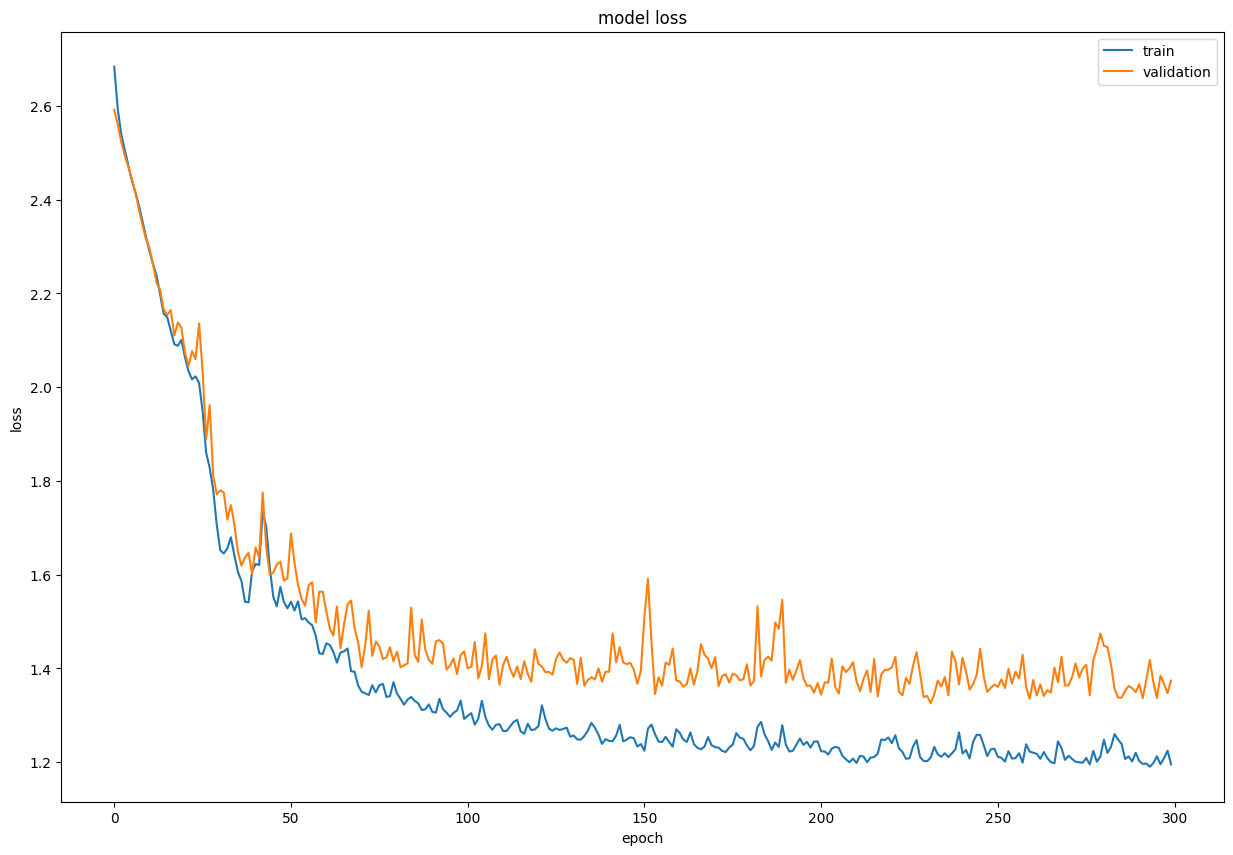

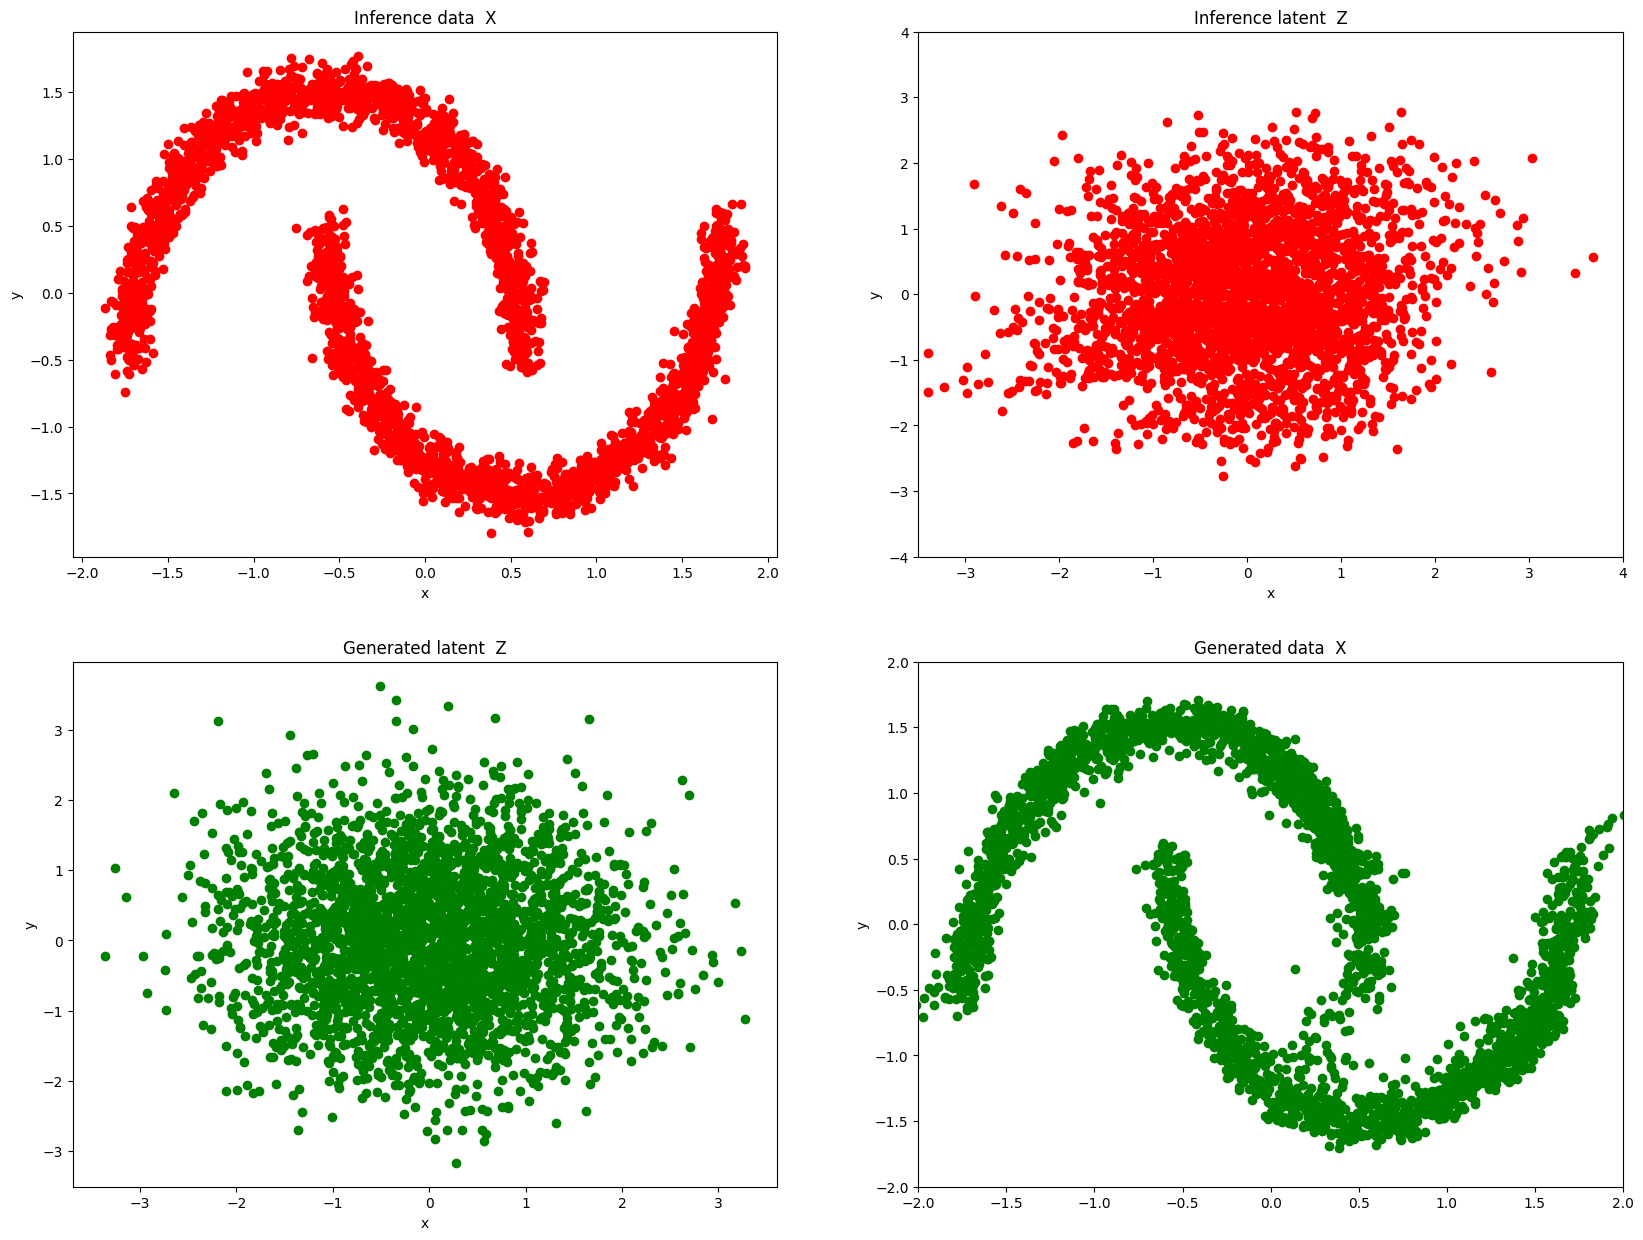

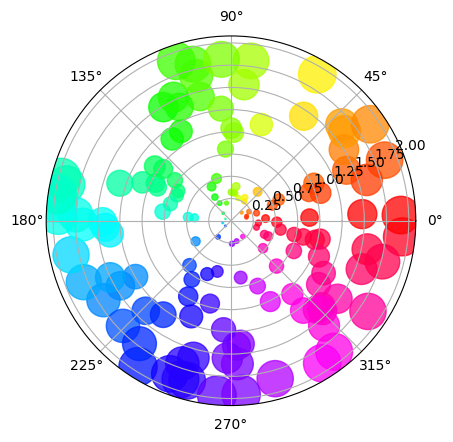

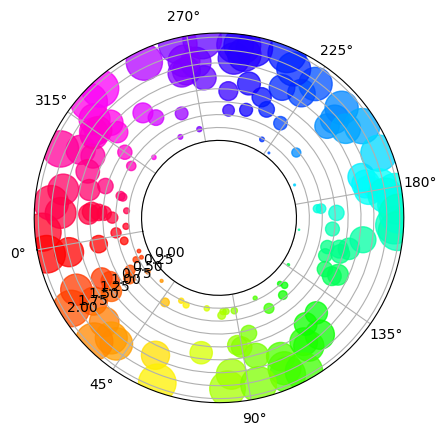

In [1]:
# Номер частицы
from sympy.physics.mechanics import Particle, Point
from sympy import Symbol
m = Symbol('m')
po = Point('po')
# create a particle container
pa = Particle('pa', po, m)
#Класс RigidBody генерирует объекты с четырьмя атрибутами: массой, центром масс, системой отсчета и кортежем инерции:
from sympy import Symbol
from sympy.physics.mechanics import ReferenceFrame, Point, RigidBody
from sympy.physics.mechanics import outer
m = Symbol('m')
A = ReferenceFrame('A')
P = Point('P')
I = outer(A.x, A.x)
# create a rigid body
B = RigidBody('B', P, A, m, (I, P))
#функции импульса в sympy.physics.mechanics.
#Начинается с создания необходимых символов для описания системы. Затем создается система отсчета и выполняется кинематика.
from sympy import symbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame
from sympy.physics.mechanics import RigidBody, Particle, Point, outer
from sympy.physics.mechanics import linear_momentum, angular_momentum
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=False)
m, M, l1 = symbols('m M l1')
q1d = dynamicsymbols('q1d')
N = ReferenceFrame('N')
O = Point('O')
O.set_vel(N, 0 * N.x)
Ac = O.locatenew('Ac', l1 * N.x)
P = Ac.locatenew('P', l1 * N.x)
a = ReferenceFrame('a')
a.set_ang_vel(N, q1d * N.z)
Ac.v2pt_theory(O, N, a)
P.v2pt_theory(O, N, a)
#Наконец, создаются органы, составляющие систему. В этом случае система состоит из частицы Pa и RigidBody A.
Pa = Particle('Pa', P, m)
I = outer(N.z, N.z)
A = RigidBody('A', Ac, a, M, (I, Ac))
#Тогда можно либо оценить импульсы отдельных компонентов системы, либо всей системы в целом.
linear_momentum(N,A)
angular_momentum(O, N, Pa)
linear_momentum(N, A, Pa)
angular_momentum(O, N, A, Pa)
#функции энергии в sympy.physics.mechanics.
from sympy import symbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, outer
from sympy.physics.mechanics import RigidBody, Particle
from sympy.physics.mechanics import kinetic_energy, potential_energy, Point
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=False)
m, M, l1, g, h, H = symbols('m M l1 g h H')
omega = dynamicsymbols('omega')
N = ReferenceFrame('N')
O = Point('O')
O.set_vel(N, 0 * N.x)
Ac = O.locatenew('Ac', l1 * N.x)
P = Ac.locatenew('P', l1 * N.x)
a = ReferenceFrame('a')
a.set_ang_vel(N, omega * N.z)
Ac.v2pt_theory(O, N, a)
P.v2pt_theory(O, N, a)
Pa = Particle('Pa', P, m)
I = outer(N.z, N.z)
A = RigidBody('A', Ac, a, M, (I, Ac))
#Затем пользователь может определить кинетическую энергию любого количества объектов системы:
kinetic_energy(N, Pa)
kinetic_energy(N, Pa, A)
#Затем можно определить потенциальную энергию любого количества объектов, составляющих систему:
Pa.potential_energy = m * g * h
A.potential_energy = M * g * H
potential_energy(A, Pa)
#Также можно определить лагранжиан этой системы:
from sympy.physics.mechanics import Lagrangian
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=False)
Lagrangian(N, Pa, A)
#Координатные символы
from sympy.physics.vector import ReferenceFrame, CoordinateSym
A = ReferenceFrame('A')
A[1]
type(A[0])
a_y = CoordinateSym('a_y', A, 1)
a_y == A[1]
def __new__(cls, name, frame, index):
        assumptions = {}
        super()._sanitize(assumptions, cls)
        obj = super().__xnew__(cls, name, **assumptions)
        _check_frame(frame)
        if index not in range(0, 3):
            raise ValueError("Invalid index specified")
        obj._id = (frame, index)
        return obj

@property
def frame(self):
        return self._id[0]

def __eq__(self, other):
        # Проверяем, является ли другой объект координатным символом того же кадра и
         # тот же индекс
        if isinstance(other, CoordinateSym):
            if other._id == self._id:
                return True
        return False

def __ne__(self, other):
        return not self == other

def __hash__(self):
        return (self._id[0].__hash__(), self._id[1]).__hash__()
 #ReferenceFrame, в котором возвращается угловое ускорение.
from sympy.physics.vector import ReferenceFrame
N=100000
N = ReferenceFrame('N')
A = ReferenceFrame('A')
V = 10 * N.x
A.set_ang_acc(N, V)
A.ang_acc_in(N)
#ReferenceFrame, в котором возвращается угловая скорость.
from sympy.physics.vector import ReferenceFrame
N = ReferenceFrame('N')
A = ReferenceFrame('A')
V = 10 * N.x
A.set_ang_vel(N, V)
A.ang_vel_in(N)
#опорная система координат A вращается относительно N
from sympy import symbols, sin, cos
from sympy.physics.vector import ReferenceFrame
q1 = symbols('q1')
N = ReferenceFrame('N')
A = ReferenceFrame('A')
A.orient_axis(N, q1, N.x)
N.dcm(A)

# Gerz
import math
B=100000
R=1 #Твёрдый шар радиуса
d=0.1#глубина проникновения
a=math.sqrt(R*d)*B/10
print(math.sqrt(a)) # область контакта
#Необходимая для этого сила равна
import math
from sympy import symbols
v1=0.30 #коэффициенты Пуассона обоих тел.
v2=0.30
E1=50*10**6 #модули упругости
E2=50*10**6
E=((1-v1**2)/E1)+((1-v2**2)/E2)
E=1/E
R1=1
R2=1.1
R=1/R1+1/R2
R=1/R
F=(4/3)*E*(R**1/2)*(d**3/2)*B/10
print(F)
#Распределение давления в площади контакта
import math
from sympy import symbols
Pi=3.14
a=0.56
E=50*10**6
d=0.1
R=1
p=(2/Pi*E*(d/R)**1/2)*(1-(R**2/a**2)**1/2)*B/10
print(p)
#Метод Адамса/BDF с автоматическим определением и переключением жесткости.
import numpy as np
from scipy.integrate import ode
def __init__(self, fun, t0, y0, t_bound, first_step=None, min_step=0.0,
                 max_step=np.inf, rtol=1e-3, atol=1e-6, jac=None, lband=None,
                 uband=None, vectorized=False, **extraneous):
        warn_extraneous(extraneous)
        super().__init__(fun, t0, y0, t_bound, vectorized)

        if first_step is None:
            first_step = 0  # Значение LSODA для автоматического выбора.
        else:
            first_step = validate_first_step(first_step, t0, t_bound)

        first_step *= self.direction

        if max_step == np.inf:
            max_step = 0  # Значение LSODA для бесконечности.
        elif max_step <= 0:
            raise ValueError("`max_step` must be positive.")

        if min_step < 0:
            raise ValueError("`min_step` must be nonnegative.")

        rtol, atol = validate_tol(rtol, atol, self.n)

        solver = ode(self.fun, jac)
        solver.set_integrator('lsoda', rtol=rtol, atol=atol, max_step=max_step,
                              min_step=min_step, first_step=first_step,
                              lband=lband, uband=uband)
        solver.set_initial_value(y0, t0)

        # Внедрить t_bound в массив rwork по мере необходимости для itask=5.
        solver._integrator.rwork[0] = self.t_bound
        solver._integrator.call_args[4] = solver._integrator.rwork

        self._lsoda_solver = solver

def _step_impl(self):
        solver = self._lsoda_solver
        integrator = solver._integrator

        # Из lsoda.step и lsoda.integrate itask=5 означает взятие одного
         # шаг и не заходить за t_bound.
        itask = integrator.call_args[2]
        integrator.call_args[2] = 5
        solver._y, solver.t = integrator.run(
            solver.f, solver.jac or (lambda: None), solver._y, solver.t,
            self.t_bound, solver.f_params, solver.jac_params)
        integrator.call_args[2] = itask

        if solver.successful():
            self.t = solver.t
            self.y = solver._y
           # Из исходного кода LSODA на Фортране njev равен nlu.
            self.njev = integrator.iwork[12]
            self.nlu = integrator.iwork[12]
            return True, None
        else:
            return False, 'Unexpected istate in LSODA.'

def _dense_output_impl(self):
        iwork = self._lsoda_solver._integrator.iwork
        rwork = self._lsoda_solver._integrator.rwork

        order = iwork[14]
        h = rwork[11]
        yh = np.reshape(rwork[20:20 + (order + 1) * self.n],
                        (self.n, order + 1), order='F').copy()

        return LsodaDenseOutput(self.t_old, self.t, h, order, yh)

import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers.ode.systems import dsolve_system
from sympy import symbols, Eq, Function
from scipy.integrate import ode
f, g = symbols("f g", cls=Function)
x = symbols("x")
B=100000
t=1

m=1.3
a=F/m
d=4
o=70
def Verle(n = 100000, h = 1, x = 1, y = (d*1)):
         for i in range(n):
          y += h *function(x, y)
          x += h
          return x, y # решение
def function (x, y):
  return ((2*x-y+a*x*y**2+o*y**4)*B/10) # функция первой производной
print(Verle())
n=100000
for i in range(n):
   eqs = [Eq(f(x).diff(x)*B/10, g(x)*B/10), Eq(g(x).diff(x), g(x))]#Давайте посмотрим на неявную систему ОДУ:
dsolve_system(eqs)
dsolve_system(eqs, ics={f(0): 1, g(0): 0})#Также можно передать начальные условия для системы ОДУ:
#При желании вы можете передать зависимые переменные и независимую переменную, для которой должна быть решена система:
g(x)==((2*(x*t)-x*(t-(d*t))+a*(t)*(d*t)**2+o*(d*t)**4))*B/10
funcs = [f(x), g(x)]
dsolve_system(eqs, funcs=funcs, t=x)
print(dsolve_system(eqs,funcs=funcs, t=x))
import matplotlib.pyplot as plt
from scipy import odr
import numpy as np
# Исправление случайного состояния для воспроизводимости
np.random.seed(19680801)
def randrange(n, vmin, vmax):
    """
    Вспомогательная функция для создания массива случайных чисел формы (n, )
     с каждым числом, распределенным равномерно (vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 1000
# Для каждого набора настроек стиля и диапазона постройте n случайных точек в поле
# определяется x в [23, 32], y в [0, 100], z в [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('o', -30, -5)]:
 xs = randrange(n, 23, 32)
 ys = randrange(n, 0, 100)

zs = randrange(n, zlow, zhigh)
ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
#Поиск ближайших соседей
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices
distances
nbrs.kneighbors_graph(X).toarray()
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid
from sympy import symbols, Eq, Function, dsolve

n_neighbors = 15
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02  # размер шага в сетке

# Создание цветовых карт
cmap_light = ListedColormap(['red', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkred', 'c', 'darkblue'])

for shrinkage in [None, .2]:
   # мы создаем экземпляр классификатора соседей и подгоняем данные.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
   # Постройте границу решения. Для этого мы присвоим цвет каждому
     # точка в сетке [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Помещаем результат в цветной график
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Также нанесите точки обучения
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs


def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
  # Черный цвет удален и вместо него используется для шума.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
 # Вероятность принадлежности точки к ее помеченному кластеру определяет
     # размер его маркера
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    for k, col in zip(unique_labels, colors):
        if k == -1:
          # Черный используется для шума.
            col = [0, 0, 0, 1]

        class_index = np.where(labels == k)[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3],[-0.85, -0.85], [-0.85, 0.85], [1.5, 1.5], [3, -3],[3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=100000, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35,0.2, 0.35, 1.35, 1.35,0.1,0.4], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
data = make_moons(3000, noise=0.05)[0].astype("float32")
norm = layers.Normalization()
norm.adapt(data)
normalized_data = norm(data)
# Creating a custom layer with keras API.
output_dim = 256
reg = 0.01


def Coupling(input_shape):
    input = keras.layers.Input(shape=input_shape)

    t_layer_1 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg)
    )(input)
    t_layer_2 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg)
    )(t_layer_1)
    t_layer_3 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg)
    )(t_layer_2)
    t_layer_4 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg)
    )(t_layer_3)
    t_layer_5 = keras.layers.Dense(
        input_shape, activation="linear", kernel_regularizer=regularizers.l2(reg)
    )(t_layer_4)

    s_layer_1 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg)
    )(input)
    s_layer_2 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg)
    )(s_layer_1)
    s_layer_3 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg)
    )(s_layer_2)
    s_layer_4 = keras.layers.Dense(
        output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg)
    )(s_layer_3)
    s_layer_5 = keras.layers.Dense(
        input_shape, activation="tanh", kernel_regularizer=regularizers.l2(reg)
    )(s_layer_4)

    return keras.Model(inputs=input, outputs=[s_layer_5, t_layer_5])
class RealNVP(keras.Model):
    def __init__(self, num_coupling_layers):
        super().__init__()

        self.num_coupling_layers = num_coupling_layers

        # Distribution of the latent space.
        self.distribution = tfp.distributions.MultivariateNormalDiag(
            loc=[0.0, 0.0], scale_diag=[1.0, 1.0]
        )
        self.masks = np.array(
            [[0, 1], [1, 0]] * (num_coupling_layers // 2), dtype="float32"
        )
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.layers_list = [Coupling(2) for i in range(num_coupling_layers)]

    @property
    def metrics(self):
        """
        The classical mechanics of contact interactions is associated primarily with the name of Heinrich Hertz.
        Classical problems of contact mechanics.
        Contact between a ball and an elastic half-space.
        Solid ball of radius R is pressed into the elastic half-space to a depth d (penetration depth),
        forming a radius contact area {\displaystyle a={\sqrt {Rd}}}.
        The force required for this is {\displaystyle F={\frac {4}{3}}E^{*}R^{1/2}d^{3/2}},
        and {\displaystyle {\frac {1}{E^{*}}}={\frac {1-\nu _{1}^{2}}{E_{1}}}+{\frac {1-\nu _{2}^{2}}{E_{2}}}}.
        E1 and E2 here are the elastic moduli,v1 and v2 Poisson's ratios of both bodies.
        When two balls with radii come into contact R1 and R2 these equations are valid respectively for the radius R.
        {\displaystyle {\frac {1}{R}}={\frac {1}{R_{1}}}+{\frac {1}{R_{2}}}}
        The pressure distribution in the contact area is calculated as.
        {\displaystyle p=p_{0}\left(1-{\frac {r^{2}}{a^{2}}}\right)^{1/2}}
        With {\displaystyle p_{0}={\frac {2}{\pi }}E^{*}\left({\frac {d}{R}}\right)^{1/2}}
        The maximum shear stress is achieved below the surface, for v=0.33 .

        """
        return [self.loss_tracker]

    def call(self, x, training=True):
        log_det_inv = 0
        direction = 1
        if training:
            direction = -1
        for i in range(self.num_coupling_layers)[::direction]:
            x_masked = x * self.masks[i]
            reversed_mask = 1 - self.masks[i]
            s, t = self.layers_list[i](x_masked)
            s *= reversed_mask
            t *= reversed_mask
            gate = (direction - 1) / 2
            x = (
                reversed_mask
                * (x * tf.exp(direction * s) + direction * t * tf.exp(gate * s))
                + x_masked
            )
            log_det_inv += gate * tf.reduce_sum(s, [1])

        return x, log_det_inv

    # Логарифм вероятности нормального распределения плюс логарифм определителя якобиана.

    def log_loss(self, x):
        y, logdet = self(x)
        log_likelihood = self.distribution.log_prob(y) + logdet
        return -tf.reduce_mean(log_likelihood)

    def train_step(self, data):
        with tf.GradientTape() as tape:

            loss = self.log_loss(data)

        g = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(g, self.trainable_variables))
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self.log_loss(data)
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}

model = RealNVP(num_coupling_layers=6)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001))

history = model.fit(
    normalized_data, batch_size=256, epochs=300, verbose=2, validation_split=0.2
)
plt.figure(figsize=(15, 10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.legend(["train", "validation"], loc="upper right")
plt.ylabel("loss")
plt.xlabel("epoch")

# От данных к скрытому пространству.
z, _ = model(normalized_data)

# От скрытого пространства к данным.
samples = model.distribution.sample(3000)
x, _ = model.predict(samples)

f, axes = plt.subplots(2, 2)
f.set_size_inches(20,15)

axes[0, 0].scatter(normalized_data[:, 0], normalized_data[:, 1], color="r")
axes[0, 0].set(title="Inference data  X", xlabel="x", ylabel="y")
axes[0, 1].scatter(z[:, 0], z[:, 1], color="r")
axes[0, 1].set(title="Inference latent  Z", xlabel="x", ylabel="y")
axes[0, 1].set_xlim([-3.5, 4])
axes[0, 1].set_ylim([-4, 4])
axes[1, 0].scatter(samples[:, 0], samples[:, 1], color="g")
axes[1, 0].set(title="Generated latent  Z", xlabel="x", ylabel="y")
axes[1, 1].scatter(x[:, 0], x[:, 1], color="g")
axes[1, 1].set(title="Generated data  X", label="x", ylabel="y")
axes[1, 1].set_xlim([-2, 2])
axes[1, 1].set_ylim([-2, 2])
# Исправление случайного состояния для воспроизводимости
np.random.seed(19680801)

# Вычисление площадей и цветов
N = 150
r = 2 * np.random.rand(N)
theta = 2* np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

ax.set_rorigin(-1.5)
ax.set_theta_zero_location('W', offset=10)
